# **AUTOR: DIEGO CODINA PINO**
# **RUT: 21.081.812-K**
# **CORREO: DIEGO.CODINA2201@ALUMNOS.UBIOBIO.CL**



In [1]:
import numpy as np
import tensorflow as tf



from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

In [2]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

In [3]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
np.unique(labs_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

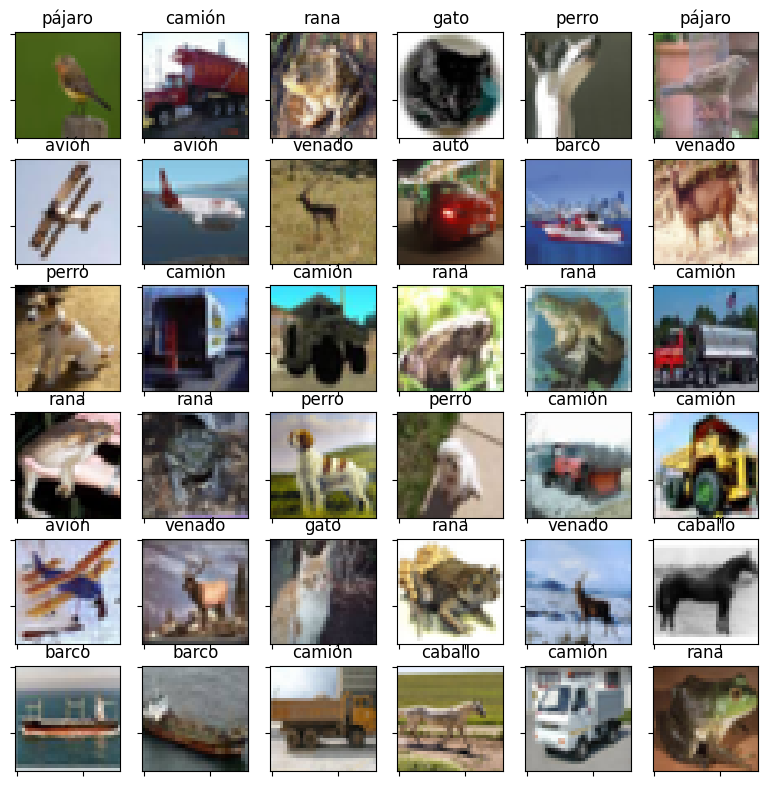

In [6]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_train))
    axs[i,j].set_title(nombres[labs_train[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_train[ex])

In [7]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [8]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_train.shape[0]
N = X_train.shape[1]
C = Y_train.shape[1]

print(M,N,C)

50000 3072 10


In [9]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Red_Evaluacion")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrena la red
num_epocas = 5
x_batch_size = 128
history = red.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.2351 - loss: 2.1116 - val_accuracy: 0.3114 - val_loss: 1.8968
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3475 - loss: 1.8482 - val_accuracy: 0.3570 - val_loss: 1.7975
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3783 - loss: 1.7676 - val_accuracy: 0.3739 - val_loss: 1.7455
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.3983 - loss: 1.7107 - val_accuracy: 0.3930 - val_loss: 1.7031
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4137 - loss: 1.6666 - val_accuracy: 0.4090 - val_loss: 1.6658


# Evaluación

## Experimentación

### Agregar más capas o más neuronas

Nota. Uno de los experimentos DEBE obtener un accuracy superior al 90%

#### Experimento 1 - 1 punto

In [11]:
# Creas el nuevo modelo
red_exp1 = keras.Sequential(name="Experimento_Con_Mas_Capas")

# CORRECTO: Agregas las capas al nuevo modelo 'red_exp1'
red_exp1.add(keras.layers.Input(shape=(N,), name='entrada_EXP1'))
red_exp1.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa_EXP1"))
red_exp1.add(keras.layers.Dense(h2, activation='relu', name="segunda_capa_EXP1"))
red_exp1.add(keras.layers.Dense(h2, activation='relu', name="tercera_capa_EXP1"))
red_exp1.add(keras.layers.Dense(h2, activation='relu', name="cuarta_capa_EXP1"))
red_exp1.add(keras.layers.Dense(h2, activation='relu', name="quinta_capa_EXP1"))
red_exp1.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida_EXP1"))

red_exp1.summary()

# Compilas el modelo correcto
red_exp1.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Entrenas el modelo correcto
print("Entrenando Experimento 1...")
inicio_exp1 = time()
history_exp1  = red_exp1.fit(X_train, Y_train, # <-- ¡CAMBIO IMPORTANTE AQUÍ TAMBIÉN!
                     epochs = 20,
                     batch_size=x_batch_size,
                     validation_data=(X_test,Y_test))
tiempo_exp1 = time() - inicio_exp1

# Evalúas el modelo correcto
test_loss_exp1, test_accuracy_exp1 = red_exp1.evaluate(X_test, Y_test, verbose=0)
print(f"\nExperimento 1 - Accuracy: {test_accuracy_exp1:.4f}, Loss: {test_loss_exp1:.4f}")
print(f"Tiempo de entrenamiento: {tiempo_exp1:.2f} segundos")



Model: "Experimento_Con_Mas_Capas"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa_EXP1 (Dense)       │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa_EXP1 (Dense)       │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa_EXP1 (Dense)       │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cuarta_capa_EXP1 (Dense)        │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ quinta_capa_EXP1 (Dense)        │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida_EXP1 (Dense)        │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904,650 (7.27 MB)

 Trainable params: 1,904,650 (7.27 MB)

 Non-trainable params: 0 (0.00 B)

Entrenando Experimento 1...
Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.2606 - loss: 2.0080 - val_accuracy: 0.3829 - val_loss: 1.7153
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.3799 - loss: 1.7164 - val_accuracy: 0.4159 - val_loss: 1.6469
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.4149 - loss: 1.6220 - val_accuracy: 0.4459 - val_loss: 1.5613
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4399 - loss: 1.5551 - val_accuracy: 0.4500 - val_loss: 1.5479
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.4627 - loss: 1.4972 - val_accuracy: 0.4700 - val_loss: 1.5006
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.4755 - loss: 1.4601 - val_accuracy: 0.4734 - val_loss: 1.4783
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.4843 - loss: 1.4372 - val_accuracy: 0.4765 - val_loss: 1.4806
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accura

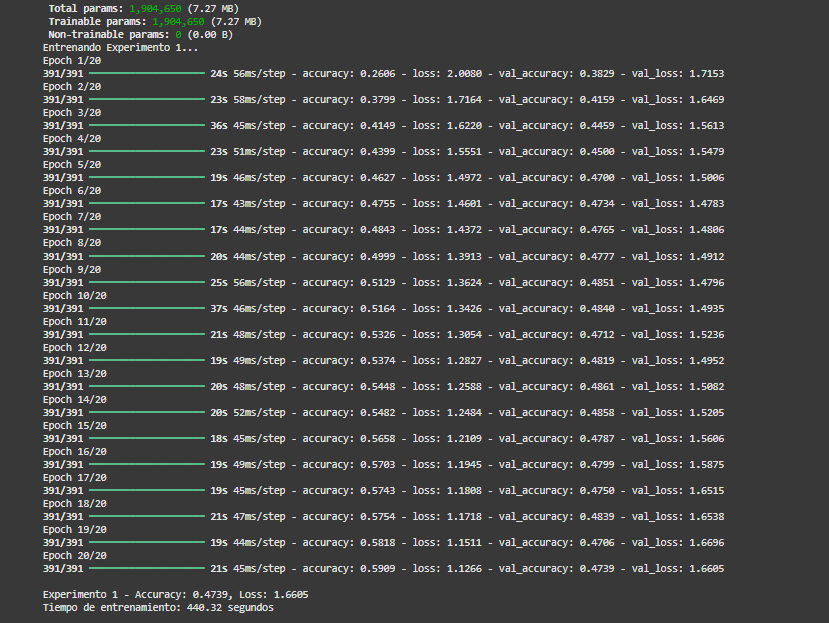

#### Experimento 2 - 1 punto

In [ ]:
X_train_reshaped = X_train.reshape(-1, 32, 32, 3)
X_test_reshaped = X_test.reshape(-1, 32, 32, 3)


red_cnn = keras.Sequential([
    # La forma de entrada ahora es (alto, ancho, canales)
    keras.layers.Input(shape=(32, 32, 3), name='entrada'),

    # Bloque Convolucional 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # Bloque Convolucional 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    # Bloque Clasificador
    keras.layers.Flatten(), # Aplanar ahora, después de extraer características
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(C, activation='softmax', name='Capa_salida')
], name="Red_CNN_Mejorada")

red_cnn.summary()


data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])


# Callback para reducir la tasa de aprendizaje cuando la validación se estanca
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2, # Reducir LR por un factor de 5
    patience=5,  # Después de 5 épocas sin mejora
    min_lr=1e-6,
    verbose=1
)

red_cnn.compile(
    # Usa un optimizador más robusto
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrena por más épocas y añade el callback
num_epocas = 20 # Un número mucho más realista
history_cnn = red_cnn.fit(
    X_train_reshaped, # <--- 50,000 imágenes
    Y_train,          # <--- 50,000 etiquetas (CORREGIDO)
    epochs=num_epocas,
    batch_size=128,
    validation_data=(X_test_reshaped, Y_test) # <--- Datos de validación correctos
)




Model: "Red_CNN_Mejorada"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/20
 79/391 ━━━━━━━━━━━━━━━━━━━━ 4:40 900ms/step - accuracy: 0.2988 - loss: 2.5383

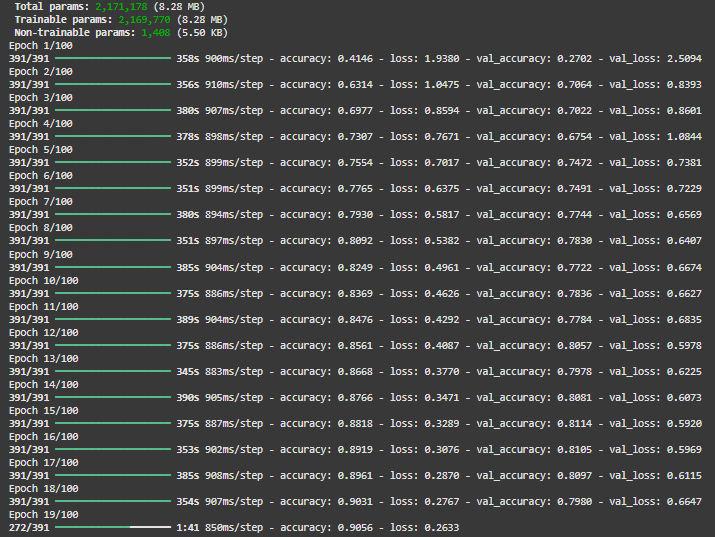

*NOTA: SE ME CAYÓ EL INTERNET Y DEJO DE ENTRENAR*

### Descripción de arquitectura de las redes de los experimentos

#### Red experimento 1 - 1 punto


Red experimento 1 - Caso Base con más capas
Para este experimento, se construyó una red neuronal secuencial, la cual es simple en su estructura. El modelo parte con una capa de entrada que define cómo serán los datos que recibirá. Luego, se apilan cinco capas ocultas de tipo Dense. La función de estas capas es tomar toda la información de la capa anterior y combinarla de forma que la red pueda ir aprendiendo las relaciones complejas entre los datos de entrada.

Finalmente, la capa de salida, también de tipo Dense, utiliza la activación softmax. Esta se encarga de tomar los valores finales de la red y transformarlos en un conjunto de probabilidades, donde cada probabilidad corresponde a una de las posibles clases a predecir. El entrenamiento se ejecuta por 20 épocas (15 más que el caso base) para ver en que punto empieza a tener un cuello de botella el modelo para este contexto.

#### Red experimento 2 - 1 punto



En teoria, las redes CNN son las mejores para el analisis de imagenes y lo pudimos comprobar acá.

En este caso utilizamos dos bloques de CNN y un bloque de salida dentro de la red neuronal. Los bloques de CNN son iguales, utilizamos la capa de conv2d para generar una matriz de caracteristicas. Luego normalizamos esta matriz para generar "estabilidad" y no se desborden los resultados para meterla de nuevo a una capa de convolución para generar otra capa de caracteristicas con los parametros que generó anteriormente. Se normaliza de nuevo con el mismo objetivo anterior y se pasa por dos capas nuevas. Max_pooling2d se encarga de reducir la dimensionalidad de la capa de caracteristicas de la capa de convolucion sin perder los rasgos más importantes y se la pasamos a "dropout" la cual desactiva un % de las neuronas para que no se genere overfitting. Se le pasa a un segundo bloque que en esencia hace lo mismo.

La capa de salida, empieza desde el flatten la cual se encarga de aplanar la matriz de caracteristicas en una matriz unidimensional para que pase por la capa "dense". Dense se encarga de hacer una combinación de información de manera lineal para que la red neuronal pueda aprender a clasificar y relacionar de manera compleja las distintas entradas.

Luego softmax se encarga de generar las probabilidades en las distintas clases.

## Análisis comparativo

### Mostrar los tiempos que tomó el entrenamiento entre el modelo base y los 2 experimentos - 0,1 puntos

MODELO BASE: 1,2 minutos

EXPERIMENTO 1: 7.21 minutos

EXPERIMENTO 2: 110 minutos

### Mostrar curvas de entrenamiento/validación - 0,1 puntos




In [ ]:

# Configurar el estilo de las gráficas
plt.style.use('seaborn')
plt.figure(figsize=(16, 6))

# Gráfica para Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_exp1.history['accuracy'], label='Entrenamiento (MLP)', color='blue', linestyle='--')
plt.plot(history_exp1.history['val_accuracy'], label='Validación (MLP)', color='blue')
plt.plot(history_cnn.history['accuracy'], label='Entrenamiento (CNN)', color='red', linestyle='--')
plt.plot(history_cnn.history['val_accuracy'], label='Validación (CNN)', color='red')
plt.title('Comparación de Accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfica para Loss
plt.subplot(1, 2, 2)
plt.plot(history_exp1.history['loss'], label='Entrenamiento (MLP)', color='blue', linestyle='--')
plt.plot(history_exp1.history['val_loss'], label='Validación (MLP)', color='blue')
plt.plot(history_cnn.history['loss'], label='Entrenamiento (CNN)', color='red', linestyle='--')
plt.plot(history_cnn.history['val_loss'], label='Validación (CNN)', color='red')
plt.title('Comparación de Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



---


## Discusiones



---



### ¿Qué tan bien funciona una red feedforward con imágenes? - 0,2 puntos

No funciona muy bien, genera overfitting por lo que el nivel de precision no es aceptable.

### ¿Existe sobreajuste? (responder 0,2 puntos y argumentar 0,8 puntos)



En el caso de red feedforward genera overfitting, dado que la Pérdida de Entrenamiento disminuye constantemente, lo que significa que el modelo se está ajustando cada vez mejor a los datos con los que entrena.

En el caso de CNN no se genera overfitting dado que no se ajusta al entrenamiento a medida que va pasando el tiempo. Esto se debe probablemente a que MaxPooling reducen el tamaño de los mapas de características, forzando al modelo a quedarse con la información más relevante y a ser invariante a pequeñas traslaciones del objeto en la imagen



### Limitaciones encontradas en el desarrollo del trabajo (indicar 3) - 0,6 puntos

1. Desconocimiento de como funcionaban las redes neuronales CNN. Las cuales son las más eficientes para reconocimiento de imágenes y videos.
2. Collab entrena MUY LENTO el modelo de CNN, lo que genero retraso en el desarrollo de este.
3. Al principio me costo bastante entender como funcionaba una red neuronal en la practica lo que pude gestionar solo cuando me puse a jugar con esta misma.

---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
+ Faltas en redacción y ortografía - 10% de la calificación final
+ Incumplimiento de rendimiento exigido - 50% de la calificación final

---